In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 生成測試數據
np.random.seed(0)
hf_data = np.random.normal(loc=50, scale=10, size=(1000, 100))
lf_data = np.random.normal(loc=50, scale=10, size=(1000, 100))


In [21]:
# 設定開始和結束的索引
first = 68
last = 69

# 迴圈處理指定範圍內的數據列
for i in range(first, last):
    # 取出每列數據的前1000個數值
    y_hf = hf_data[:1000, i]
    y_lf = lf_data[:1000, i]
    
    # 初始化低頻數據的索引列表
    index_lf = []
    # 查找低頻數據中的局部最小值
    for a in range(len(y_lf) - 1):
        if (y_lf[a] < y_lf[a + 1]) and (y_lf[a] < y_lf[a - 1]) and (y_lf[a] > 51):
            index_lf.append(y_lf[a])
    index_lf = np.array(index_lf)
    if len(index_lf) > 0:
        lf_min = index_lf.min()
    else:
        lf_min = 51  # 預設值，避免空列表時出錯
    
    # 初始化高頻數據的索引列表
    index_hf = []
    # 查找高頻數據中的局部最大值
    for a in range(len(y_hf) - 1):
        if (y_hf[a] > y_hf[a + 1]) and (y_hf[a] > y_hf[a - 1]) and (y_hf[a] < 49):
            index_hf.append(y_hf[a])
    index_hf = np.array(index_hf)
    if len(index_hf) > 0:
        hf_max = index_hf.max()
    else:
        hf_max = 49  # 預設值，避免空列表時出錯

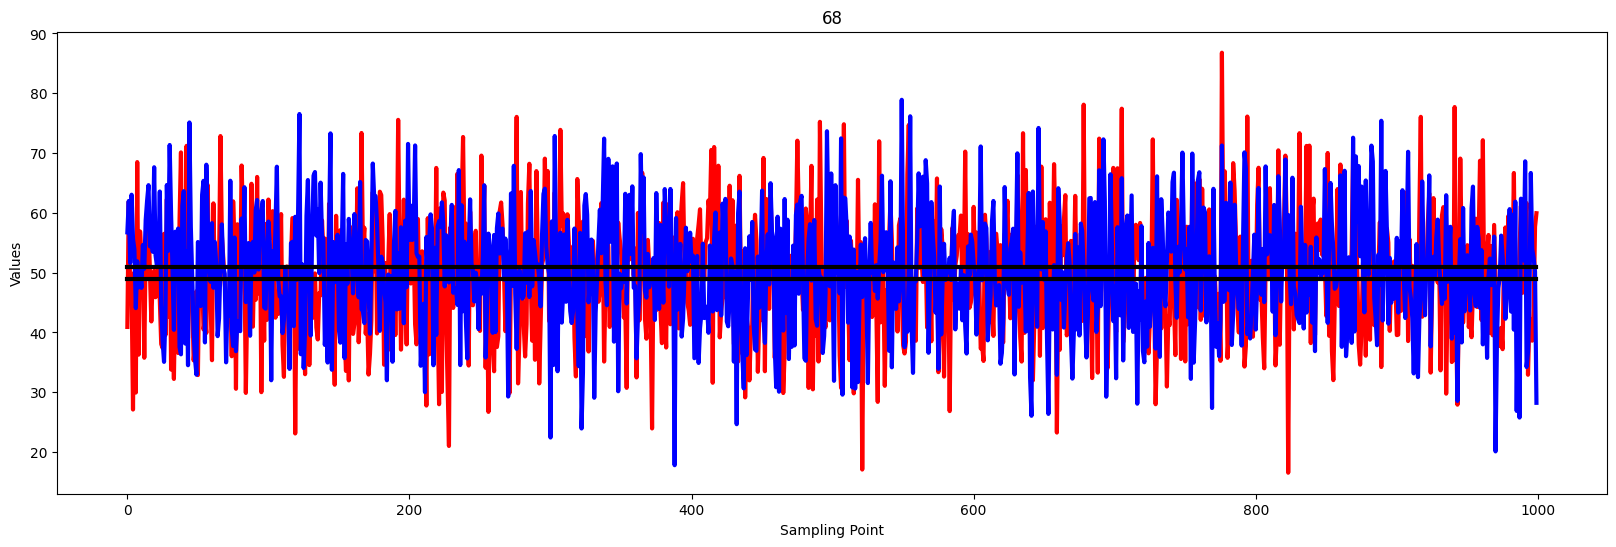

In [22]:
# 繪製圖表
the_index_lf = np.full((len(y_lf)), lf_min)
the_index_hf = np.full((len(y_hf)), hf_max)
x = np.arange(len(y_hf))
plt.figure(figsize=(20, 6))
plt.plot(x, y_hf, color='r', linewidth=3)
plt.plot(x, y_lf, color='b', linewidth=3)
plt.plot(x, the_index_lf, color='black', linewidth=3)
plt.plot(x, the_index_hf, color='black', linewidth=3)
plt.xlabel("Sampling Point")
plt.ylabel("Values")
plt.title(i)
plt.show()

In [23]:
# 刪除低於局部最小值的低頻數據
delete_lf = []
for a in range(len(y_lf)):
    if y_lf[a] < lf_min:
        delete_lf.append(a)
y_lf = np.delete(y_lf, delete_lf)

# 刪除高於局部最大值的高頻數據
delete_hf = []
for a in range(len(y_hf)):
    if y_hf[a] > hf_max:
        delete_hf.append(a)
y_hf = np.delete(y_hf, delete_hf)


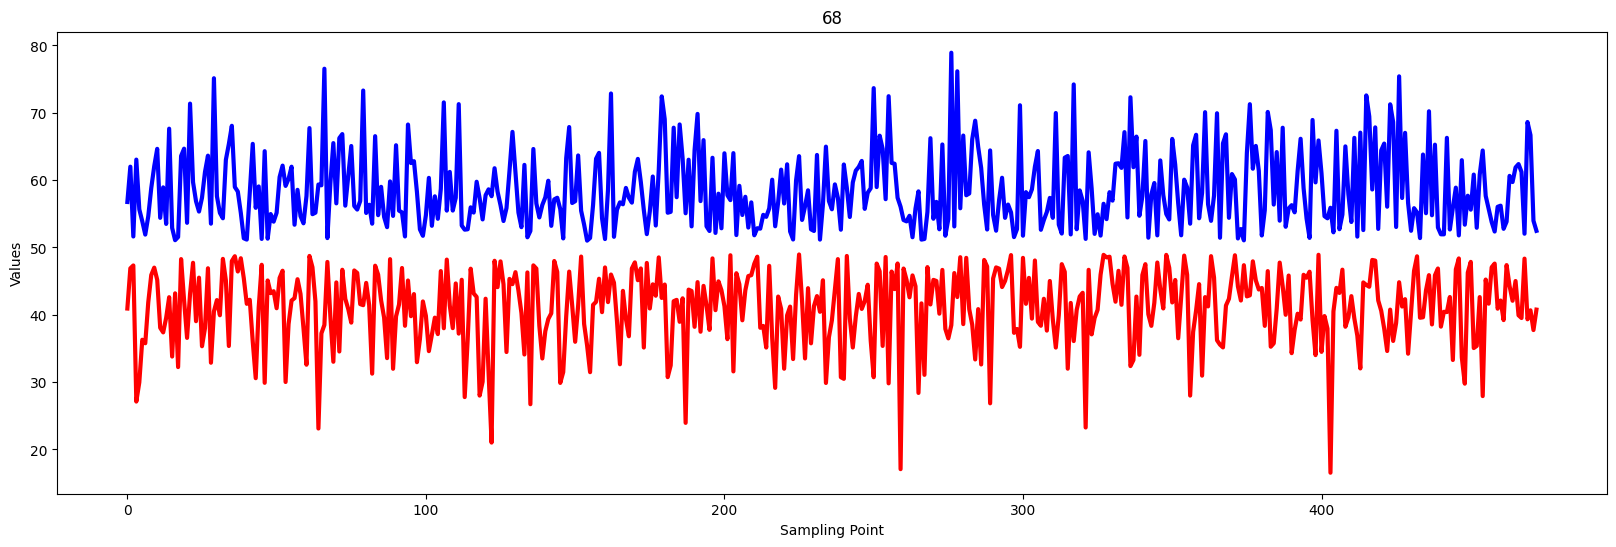

In [24]:
# 再次繪製圖表
x = np.arange(len(y_lf))
plt.figure(figsize=(20, 6))
plt.plot(x, y_hf[:len(y_lf)], color='r', linewidth=3) # 確保 y_lf 的長度與 y_hf 相同
plt.plot(x, y_lf, color='b', linewidth=3)  
plt.xlabel("Sampling Point")
plt.ylabel("Values")
plt.title(i)
plt.show()